In [1]:
import sys
sys.path.insert(1, r'../../../Projects/Relevancer/')  # add to pythonpath

In [2]:
import timeit
import importlib
import relevancer as rlv
import pandas as pd
from sklearn.naive_bayes import MultinomialNB 
from bson.objectid import ObjectId
from collections import Counter
import numpy as np

pd.set_option("display.max_colwidth",200)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# this is just to load the latest version of the Relevancer after we edit the code.
importlib.reload(rlv)
active_col = "active_text"
rlv.set_active_column(active_col)
rlv.my_token_pattern

'\\w+(?:-\\w+)+|[-+]?\\d+[.,]?\\d+|[#@]?\\w+\\b|[\\U00010000-\\U0010ffff\\U0001F300-\\U0001F64F\\U0001F680-\\U0001F6FF\\u2600-\\u26FF\\u2700-\\u27BF]|[.:()[],;?!*]{2,4}'

In [4]:
tweetlist = rlv.read_json_tweets_file("tweets_griep.json", reqlang='nl')

Number of documents per languge: Counter({'NoLang': 188474, 'nl': 41020, 'de': 35, 'en': 33, 'da': 28, 'pl': 19, 'id': 18, 'no': 9, 'sv': 7, 'lv': 6, 'vi': 6, 'tl': 5, 'tr': 4, 'ht': 3, 'lt': 2, 'hu': 2, 'pt': 2, 'es': 2, 'fr': 1, 'is': 1, 'et': 1, 'fi': 1})


In [8]:
len(tweetlist)

229494

In [9]:
tweetdf = rlv.create_dataframe(tweetlist)

229494


In [20]:
tweetdf[active_col] = tweetdf["text"].copy()
tweetdf = rlv.tok_results(tweetdf, elimrt = True)


Available attributes of the tweets: Index(['coordinates', 'country', 'device', 'entity_hashtags',
       'entity_mentions', 'entity_type', 'entity_urls', 'id_str',
       'in_reply_to_user_id', 'is_retweet', 'screen_name', 'text',
       'user_followers', 'user_following', 'user_id', 'twcnt', 'active_text',
       'texttok'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 229494 entries, 2010-12-16 18:55:30 to 2013-06-30 21:41:57
Data columns (total 18 columns):
coordinates            3984 non-null object
country                5592 non-null object
device                 229494 non-null object
entity_hashtags        229494 non-null object
entity_mentions        229494 non-null object
entity_type            1080 non-null object
entity_urls            229494 non-null object
id_str                 229494 non-null object
in_reply_to_user_id    71591 non-null float64
is_retweet             229494 non-null bool
screen_name            229494 non-null object
text  

../../../Projects/Relevancer/relevancer.py:599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tweetsDF[active_column] = tweetsDF[tok_result_lower_col].copy()


In [21]:
tweetndf = rlv.normalize_text(tweetdf)

../../../Projects/Relevancer/relevancer.py:412: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  mytextDF[active_column] = mytextDF[active_column].apply(lambda tw: re.sub(http_re, 'urlurlurl', tw))
../../../Projects/Relevancer/relevancer.py:413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  mytextDF[active_column] = mytextDF[active_column].apply(lambda tw: re.sub(usr_re, 'usrusrusr', tw))


In [40]:
len(tweetndf)

205397

In [32]:
tweetndf.head(1)

coordinates country   device entity_hashtags  \
created_at                                                         
2010-12-16 18:55:30        None     NaN  Echofon         [balen]   

                                                       entity_mentions  \
created_at                                                               
2010-12-16 18:55:30  [edbananeman, atzedevrieze, alexmaslow, Sandeman]   

                    entity_type entity_urls             id_str  \
created_at                                                       
2010-12-16 18:55:30         NaN          []  15480152288919552   

                     in_reply_to_user_id is_retweet     screen_name  \
created_at                                                            
2010-12-16 18:55:30           12209582.0      False  PeterHoogeveen   

                                                                                                                                         text  \
created_at                                                                                                                                      
2010-12-16 18:55:30  @edbananeman @atzedevrieze @alexmaslow @Sandeman ik vind het zwaar klote, maar de griep houdt me thuis morgen :-( #balen   

                     user_followers  user_following  user_id  twcnt  \
created_at                                                            
2010-12-16 18:55:30             208             169  5314672      1   

                                                                                                                         active_text  \
created_at                                                                                                                             
2010-12-16 18:55:30  usrusrusr usrusrusr usrusrusr usrusrusr ik vind het zwaar klote, maar de griep houdt me thuis morgen :-( #balen   

                                                                                                                                      texttok  \
created_at                                                                                                                                      
2010-12-16 18:55:30  @edbananeman @atzedevrieze @alexmaslow @sandeman ik vind het zwaar klote, maar de griep houdt me thuis morgen :-( #balen   

                    is_notrt  
created_at                    
2010-12-16 18:55:30     True

In [38]:
tweetndf.groupby(active_col).size().sort_values(ascending=False)

active_text
usrusrusr griep is erg vervelend. hier een overzicht van tips, informatie en wat je zelf kunt doen #zelfzorg. urlurlurl                      1021
usrusrusr tips bij griep? er zijn wat manieren om de symptomen te verlichten. lees hier meer tips #zelfzorg. urlurlurl                        980
bestziek\ngriep. op de een of andere manier slaat het bij mannen altijd harder toe. soort virale mutatie. #bestziek                           456
kut griep                                                                                                                                     116
** schone handen. de beste verdediging tegen de griep! ** actie 25% korting op het aseptix assortiment **  urlurlurl                           91
usrusrusr heb je griep?                                                                                                                        80
usrusrusr griep is erg vervelend. hier een overzicht van tips, informatie en wat je zelf kunt doen. urlurlurl   

In [39]:
tweetndf[active_col].value_counts()

usrusrusr griep is erg vervelend. hier een overzicht van tips, informatie en wat je zelf kunt doen #zelfzorg. urlurlurl                         1021
usrusrusr tips bij griep? er zijn wat manieren om de symptomen te verlichten. lees hier meer tips #zelfzorg. urlurlurl                           980
bestziek\ngriep. op de een of andere manier slaat het bij mannen altijd harder toe. soort virale mutatie. #bestziek                              456
kut griep                                                                                                                                        116
** schone handen. de beste verdediging tegen de griep! ** actie 25% korting op het aseptix assortiment **  urlurlurl                              91
usrusrusr heb je griep?                                                                                                                           80
usrusrusr griep is erg vervelend. hier een overzicht van tips, informatie en wat je zelf kunt doen. urlurl

In [41]:
tweetndf_uniq1 = tweetndf.drop_duplicates(subset=active_col)
len(tweetndf_uniq1)

196706

In [42]:
tweetndf_uniq1.loc[:,'twcnt'] = 1

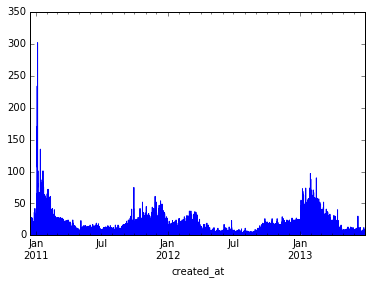

In [53]:
tweetndf_uniq1.twcnt.resample('1H').sum().fillna(0).plot()

In [54]:
# We need to distinguish professional users!
tweetndf_uniq1.groupby("screen_name").size().sort_values(ascending=False)

screen_name
griepheadlines     1198
Ikvoelmeziek       1048
varkens_griep       927
grieptweets         424
Rider_ot_Storm       89
conavanderhorn       87
SPaanhangster        79
GertvanderHoek       79
DhrRonny             76
sasjabrouwers1       75
varkensgriep         69
eddy_terstall        69
nieuwsheadline       66
bondtegengriep       65
Emiraten1975         62
zorgbeheer           60
miekeroth            56
AnitaUnderCover      54
Kanarienieuws        54
vester71             52
docteronline         52
Dutchy123            51
natasja73            51
RiannevdBroek        51
Brasil_maria_        50
San_Tuinenburg       49
jasmijn02            48
Gooische_Vrouw       46
Sgele                46
MarieJoseGMH         44
                   ... 
diana_lucky           1
dianaberg1996         1
dianadeboer           1
dianadebruin          1
dhrshocker            1
dhrroberto            1
dezetijd              1
dhrkevin              1
dezeurlisnogvry       1
dezoefhaas            1
dezo

In [55]:
tweetndf_uniq1.device.value_counts()

web                          42234
Twitter for iPhone           31854
Twitter for Android          24716
Twitter for BlackBerry®      22987
TweetDeck                    18360
UberSocial for BlackBerry     7046
Twitter for iPad              6233
twitterfeed                   4865
Echofon                       4461
Mobile Web                    4056
ÜberTwitter                   2658
HootSuite                     1886
Facebook                      1409
TweetCaster for Android       1342
ÜberSocial                    1285
Tweetbot for iOS              1233
ifttt                         1057
  HTC Peep                     982
Tweet Button                   971
Twitter for Mac                967
Twitterrific                   900
Snaptu                         841
Hyves                          704
UberSocial                     678
Google                         557
TweetCaster                    537
UberSocial for Android         501
TwitBird                       450
Mobile Web (M5)     

In [56]:
tweetndf_uniq1.country.value_counts()

The Netherlands                      4051
Nederland                            1042
Belgium                               146
België                                 77
France                                 21
Germany                                17
South Africa                           16
Netherlands                            14
Spain                                   9
United States                           8
United Kingdom                          7
Switzerland                             7
Suriname                                6
Pays-Bas                                5
Italy                                   4
Niederlande                             4
Austria                                 4
Duitsland                               3
Portugal                                2
Russia                                  2
Sverige                                 1
Spanje                                  1
Hungary                                 1
Denmark                           

In [68]:
tweetndf_uniq1[tweetndf_uniq1.country=="Turkey"]

coordinates country device entity_hashtags  \
created_at                                                       
2012-01-02 17:01:56        None  Turkey    web              []   

                    entity_mentions entity_type entity_urls  \
created_at                                                    
2012-01-02 17:01:56   [cescolevens]         NaN          []   

                                 id_str  in_reply_to_user_id is_retweet  \
created_at                                                                
2012-01-02 17:01:56  153883735060787200           98117733.0      False   

                       screen_name  \
created_at                           
2012-01-02 17:01:56  Ilovebabygigi   

                                                                                                                                                             text  \
created_at                                                                                                                                                          
2012-01-02 17:01:56  @cescolevens geworden. griep en gisteren had ze koorts. gaat nu wat beter vandaar dat ze een sauto lust. mi sa nak ing wan snees taja morgen   

                     user_followers  user_following   user_id  twcnt  \
created_at                                                             
2012-01-02 17:01:56             191             295  35740781      1   

                                                                                                                                                   active_text  \
created_at                                                                                                                                                       
2012-01-02 17:01:56  usrusrusr geworden. griep en gisteren had ze koorts. gaat nu wat beter vandaar dat ze een sauto lust. mi sa nak ing wan snees taja morgen   

                                                                                                                                                          texttok  \
created_at                                                                                                                                                          
2012-01-02 17:01:56  @cescolevens geworden. griep en gisteren had ze koorts. gaat nu wat beter vandaar dat ze een sauto lust. mi sa nak ing wan snees taja morgen   

                    is_notrt  
created_at                    
2012-01-02 17:01:56     True

In [57]:
htag_counter = Counter()
[htag_counter.update(ht) for ht in tweetndf_uniq1[tweetndf_uniq1.entity_hashtags.notnull()]["entity_hashtags"].values]
htag_counter.most_common() 

[('griep', 24780),
 ('ziek', 1669),
 ('ivmz', 1082),
 ('Griep', 1048),
 ('nieuws', 798),
 ('koorts', 786),
 ('verkouden', 692),
 ('balen', 444),
 ('beterschap', 431),
 ('durftevragen', 414),
 ('dtv', 339),
 ('bah', 298),
 ('hoofdpijn', 288),
 ('keelpijn', 270),
 ('fb', 237),
 ('fail', 228),
 ('twexit', 220),
 ('gezondheid', 219),
 ('verkoudheid', 209),
 ('fml', 207),
 ('moe', 158),
 ('spierpijn', 154),
 ('hoesten', 146),
 ('slapen', 144),
 ('uitzieken', 142),
 ('misselijk', 140),
 ('beroerd', 131),
 ('influenza', 129),
 ('koud', 128),
 ('kut', 127),
 ('zielig', 126),
 ('zucht', 118),
 ('nietleuk', 117),
 ('not', 114),
 ('GRIEP', 112),
 ('griepprik', 111),
 ('kutzooi', 96),
 ('bed', 92),
 ('zinin', 88),
 ('paracetamol', 87),
 ('koppijn', 84),
 ('buikpijn', 82),
 ('keelontsteking', 81),
 ('Ziek', 76),
 ('ziekjes', 76),
 ('snotter', 75),
 ('fijn', 73),
 ('FML', 73),
 ('griepepidemie', 70),
 ('hardlopen', 68),
 ('snot', 64),
 ('klaagtweet', 64),
 ('pff', 63),
 ('goedemorgen', 62),
 ('Mexic

In [58]:
tweetndf_uniq1.entity_type.value_counts()

photo    942
Name: entity_type, dtype: int64

In [59]:
tweetndf_uniq1.ix[tweetndf_uniq1.index.duplicated()]

coordinates country                   device  \
created_at                                                         
2010-12-20 12:45:35        None     NaN                      web   
2010-12-20 15:42:12        None     NaN              twitterfeed   
2010-12-20 15:47:52        None     NaN              twitterfeed   
2010-12-21 06:06:24        None     NaN              twitterfeed   
2010-12-22 08:19:31        None     NaN          Twitstat Mobile   
2010-12-27 02:27:45        None     NaN              twitterfeed   
2010-12-27 17:51:41        None     NaN              twitterfeed   
2010-12-27 20:57:56        None     NaN                  Echofon   
2010-12-28 08:08:36        None     NaN                  Brizzly   
2010-12-29 12:24:58        None     NaN                TweetDeck   
2010-12-30 13:13:40        None     NaN                TweetDeck   
2010-12-31 23:12:48        None     NaN               Mobile Web   
2011-01-01 11:56:33        None     NaN       Twitter for iPhone   
2011-01-02 13:08:41        None     NaN  Twitter for BlackBerry®   
2011-01-03 09:39:22        None     NaN              twitterfeed   
2011-01-03 11:42:28        None     NaN                      web   
2011-01-03 11:56:27        None     NaN                TweetDeck   
2011-01-03 15:20:04        None     NaN                      web   
2011-01-03 17:27:11        None     NaN             Chromed Bird   
2011-01-03 17:59:51        None     NaN      Twitter for Android   
2011-01-03 20:28:37        None     NaN                      web   
2011-01-04 06:16:03        None     NaN  Twitter for BlackBerry®   
2011-01-04 11:46:13        None     NaN       Twitter for iPhone   
2011-01-04 13:45:46        None     NaN              ÜberTwitter   
2011-01-04 14:46:13        None     NaN              twitterfeed   
2011-01-04 14:57:30        None     NaN              twitterfeed   
2011-01-04 14:57:30        None     NaN              twitterfeed   
2011-01-04 14:57:32        None     NaN              twitterfeed   
2011-01-04 14:57:32        None     NaN              twitterfeed   
2011-01-04 14:57:32        None     NaN              twitterfeed   
...                         ...     ...                      ...   
2013-03-19 07:56:45        None     NaN              twitterfeed   
2013-03-19 10:01:04        None     NaN       Twitter for iPhone   
2013-03-19 11:57:31        None     NaN              twitterfeed   
2013-03-19 13:33:16        None     NaN              twitterfeed   
2013-03-20 13:19:44        None     NaN                TweetDeck   
2013-03-21 10:41:26        None     NaN      Twitter for Android   
2013-03-21 11:30:37        None     NaN               NOS on iOS   
2013-03-23 19:26:18        None     NaN      Twitter for Android   
2013-03-25 07:29:08        None     NaN                      web   
2013-03-25 08:51:48        None     NaN  Twitter for BlackBerry®   
2013-03-26 03:25:48        None     NaN  TweetCaster for Android   
2013-03-26 08:25:54        None     NaN      Twitter for Android   
2013-03-30 20:53:01        None     NaN                TweetDeck   
2013-03-31 09:17:09        None     NaN              twitterfeed   
2013-04-02 08:57:50        None     NaN      Twitter for Android   
2013-04-03 02:04:34        None     NaN                TweetDeck   
2013-04-05 13:48:20        None     NaN                 Facebook   
2013-04-06 07:41:40        None     NaN       Twitter for iPhone   
2013-04-08 16:08:29        None     NaN                   Google   
2013-04-09 13:20:16        None     NaN  Twitter for BlackBerry®   
2013-04-10 09:21:33        None     NaN                   Google   
2013-04-12 19:23:29        None     NaN                  Echofon   
2013-04-13 06:34:41        None     NaN              twitterfeed   
2013-04-14 10:12:42        None     NaN              twitterfeed   
2013-04-15 09:42:19        None     NaN              twitterfeed   
2013-04-15 10:30:14        None     NaN              twitterfeed   
2013-04-

In [60]:
tweetndf_uniq2 = rlv.eliminate_duplicates_bucketwise(tweetndf.reset_index())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14349 entries, 0 to 12171
Data columns (total 20 columns):
created_at             14349 non-null datetime64[ns]
coordinates            293 non-null object
country                404 non-null object
device                 14349 non-null object
entity_hashtags        14349 non-null object
entity_mentions        14349 non-null object
entity_type            80 non-null object
entity_urls            14349 non-null object
id_str                 14349 non-null object
in_reply_to_user_id    4984 non-null float64
is_retweet             14349 non-null bool
screen_name            14349 non-null object
text                   14349 non-null object
user_followers         14349 non-null int64
user_following         14349 non-null int64
user_id                14349 non-null object
twcnt                  14349 non-null int64
active_text            14349 non-null object
texttok                14349 non-null object
is_notrt               14349 non-null bo

In [61]:
tweetndf_uniq2.to_pickle("griep_unique_2.pickle")

In [62]:
len(tweetndf_uniq2)

183274

In [64]:
my_token_pattern = r"\w+(?:-\w+)+|[-+]?\d+[.,]?\d+|[#@]?\w+\b|[\U00010000-\U0010ffff\U0001F300-\U0001F64F\U0001F680-\U0001F6FF\u2600-\u26FF\u2700-\u27BF]|[.:()[],;?!*]{2,4}"
cluster_list = rlv.create_clusters(tweetndf_uniq2, my_token_pattern, min_dist_thres=0.725, max_dist_thres=0.875, min_max_diff_thres=0.4, nameprefix='1-', min_clusters=150, user_identifier='screen_name')

In [65]:
cluster_list

16

In [66]:
with open("20160419_griep_clusters.txt",'w') as fw:
    for i,clst in enumerate(cluster_list):
        fw.write("\nOrder of the cluster:"+str(i)+"\n")
        fw.write("CStr:"+clst['cstr']+"\n")
        fw.write("\n".join([" ".join(c[2].split("\n")) for c in clst['ctweettuplelist']])+"\n")
        fw.write("**********"*11)